In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [44]:
df = pd.read_csv('../data/csv/000300.SH.csv')
df['date']=df['date'].apply(lambda x:str(x))
df.set_index('date',inplace=True)
df.sort_index(ascending=True,inplace=True)
df = df[df.index>'20100101']
df.head()

,code,close,open,high,low,volume,amount
date,,,,,,,
20100104,000300.SH,3535.229,3592.468,3597.748,3535.229,66101080.0,9.341984e+07
20100105,000300.SH,3564.038,3545.186,3577.526,3497.661,85809641.0,1.283024e+08
20100106,000300.SH,3541.727,3558.700,3588.832,3541.173,78473125.0,1.210460e+08
20100107,000300.SH,3471.456,3543.160,3558.556,3452.769,80350037.0,1.204362e+08
20100108,000300.SH,3480.130,3456.908,3482.083,3426.698,60790253.0,9.019096e+07


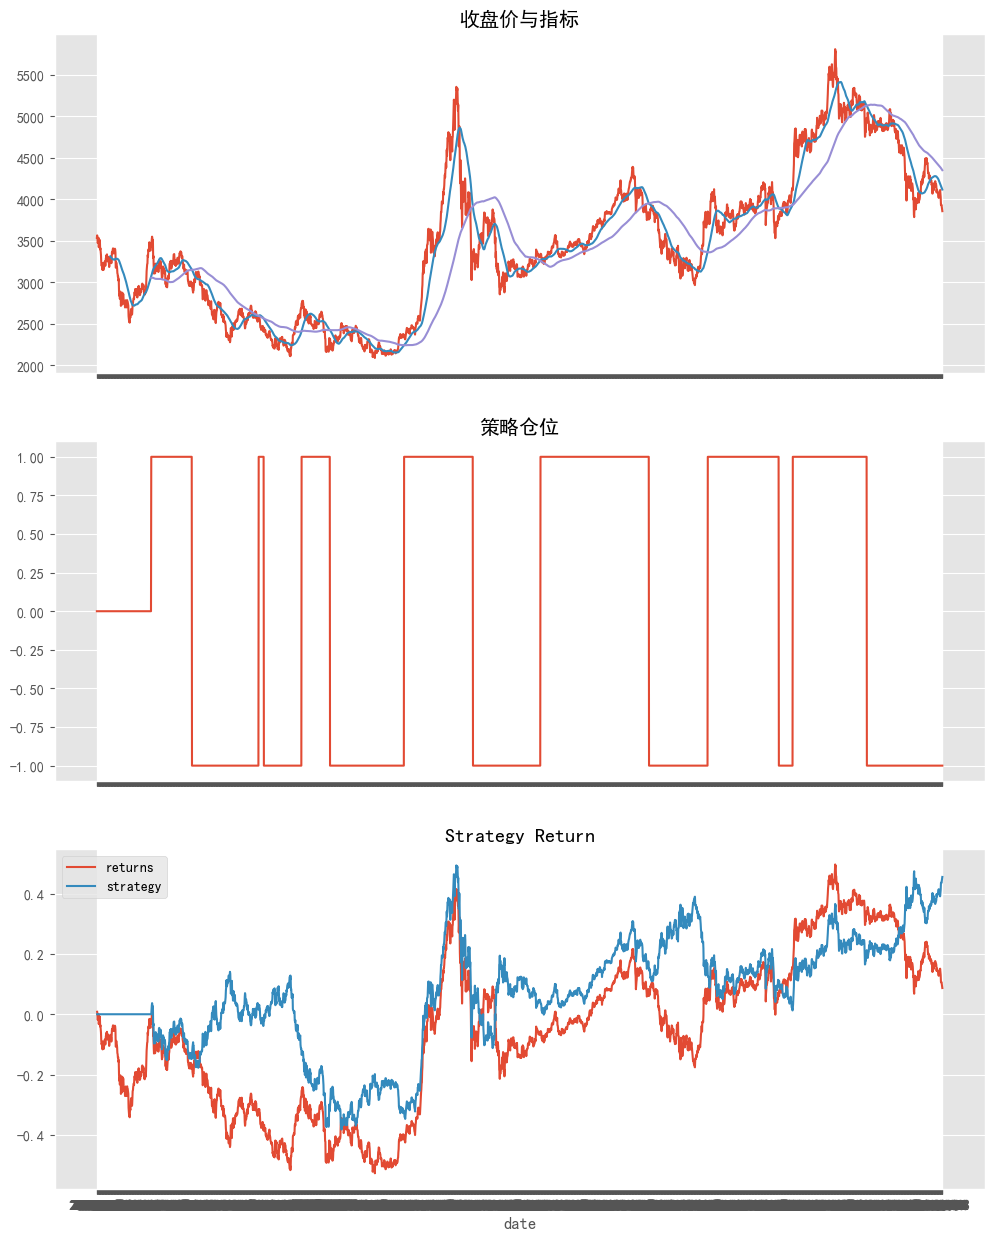

In [45]:
df['fast_sma'] = df['close'].rolling(50).mean()
df['slow_sma'] = df['close'].rolling(200).mean()
df['diff_sma'] = df['fast_sma'] - df['slow_sma']
df['signal'] = np.where(df['diff_sma']>0,1,0)
df['signal'] = np.where(df['diff_sma']<0,-1,df['signal'])

df["returns"] = np.log(df["close"] / df["close"].shift(1))
df["strategy"] = df["signal"].shift(1) * df["returns"]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

ax[0].plot(df.index, df["close"])
ax[0].plot(df.index, df["fast_sma"])
ax[0].plot(df.index, df["slow_sma"])
ax[0].set_title("收盘价与指标")

ax[1].plot(df.index, df["signal"])
ax[1].set_title("策略仓位")

df[["returns", "strategy"]].cumsum().plot(ax=ax[2], title="回测收益")

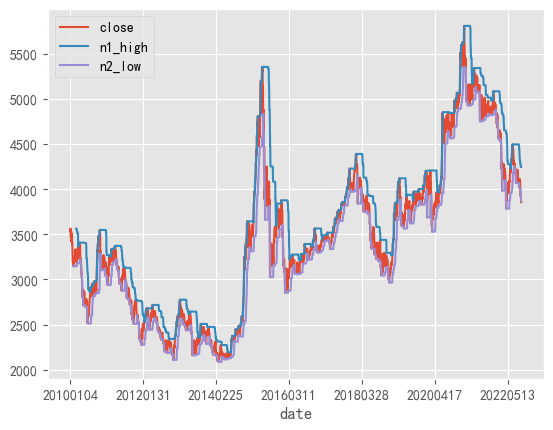

In [47]:
df['n1_high'] = df['close'].rolling(42).max().shift(1)
df['n2_low'] = df['close'].rolling(21).min().shift(1)
df[['close','n1_high','n2_low']].plot()

In [48]:
df['buy_signal'] = df.close>df.n1_high
df['sell_signal'] = df.close<df.n2_low
print(df['buy_signal'].value_counts())
print(df['sell_signal'].value_counts())
df['signal'] = np.where(df['n1_high']>df['close'],1,0)
df['signal'] = np.where(df['close']<df['n2_low'],-1,df['signal'])

False    2789
True      305
Name: buy_signal, dtype: int64
False    2773
True      321
Name: sell_signal, dtype: int64


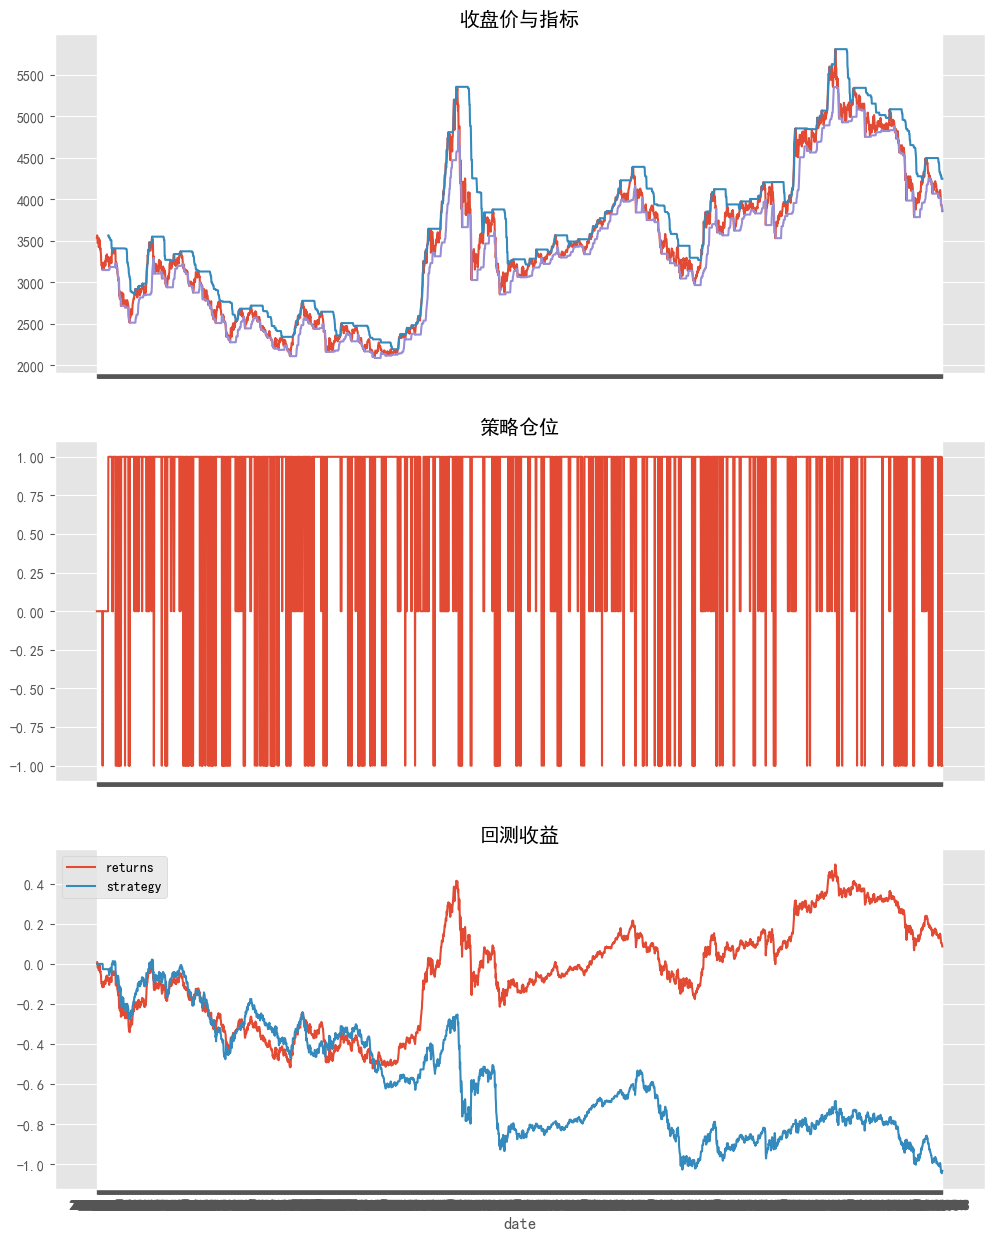

In [50]:
df["returns"] = np.log(df["close"] / df["close"].shift(1))
df["strategy"] = df["signal"].shift(1) * df["returns"]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

ax[0].plot(df.index, df["close"])
ax[0].plot(df.index, df["n1_high"])
ax[0].plot(df.index, df["n2_low"])
ax[0].set_title("收盘价与指标")

ax[1].plot(df.index, df["signal"])
ax[1].set_title("策略仓位")

df[["returns", "strategy"]].cumsum().plot(ax=ax[2], title="回测收益")